# 5. Árboles de Decisión

Veremos árboles de decisión y los conceptos subyacentes asociados.

Haremos ejemplos de juguete y con datos generados artificialmente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Entropía y Ganancia de Información

### Entropía

Definamos entropía para una distribución probabilista:

$$H(Y) = - \sum_{i=1}^k P(Y = y_i) log_2 P(Y = y_i)$$

In [2]:
def entropy(probs):
    return - np.sum(probs * np.log2(probs)) #vector de probabilidades

Veamos posibles entropías para el problema de tirar una moneda adulterada:

In [3]:
entropy(np.array([0.5, 0.5]))

1.0

In [56]:
entropy(np.array([0.01, 0.99])) #el resultado implica que estoy muy seguro q el resultado va a ser cara

1.0

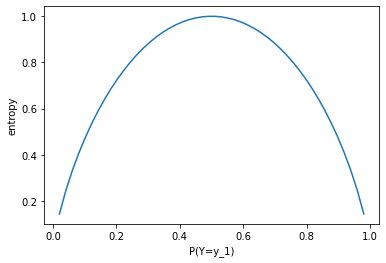

In [5]:
X = np.linspace(0, 1)[1:-1]
plt.plot(X, [entropy([x, 1-x]) for x in X])
plt.xlabel('P(Y=y_1)')
plt.ylabel('entropy')
plt.show()

La entropía se puede interpretar como la cantidad de bits necesarias para codificar una predicción.
En el caso de dos monedas, tenemos cuatro resultados posibles. Ejemplos:

In [6]:
entropy(np.array([0.25, 0.25, 0.25, 0.25]))

2.0

ejemplo, un dado de cuatro lados y es completamente justo. Tengo 4 valores posibles todas con un mismo porcentaje de probabilidad. Como tengo 4 valores posibles necesito 2 bits para codificar el mensaje de la variable que quiero predecir

In [7]:
entropy(np.array([0.97, 0.01, 0.01, 0.01]))

0.24194073285321088

In [57]:
entropy(np.array([0.49, 0.49, 0.01, 0.01]))

1.0

la posibilidad que caiga sobre dos dados es del 49%. necesito 1 bit

### Entropía de un Dataset

Un dataset define una distribución empírica. La entropía del dataset es entones la entropía de la distribución asociada. Definamos el cálculo de la distribución, y luego redefinamos entropía:

In [8]:
def probs(y):
    _, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return probs

In [58]:
y_true = np.array([1, 1, 1, 1, 1, -1]) # 5 etiquetas positiva y una negativa

In [10]:
probs(y_true)

array([0.16666667, 0.83333333])

primero calcula una probabilidad empirica

In [11]:
def entropy(y):
    p = probs(y)
    return - np.sum(p * np.log2(p))

In [12]:
entropy(y_true)

0.6500224216483541

### Entropía Condicional

Definamos entropía condicional:

$$H(Y|X) = - \sum_{j=1}^v P(X = x_j) \sum_{i=1}^k P(Y = y_i | X = x_j) log_2 P(Y = y_i | X = x_j)$$

Equivalentemente, 

$$H(Y|X) = \sum_{j=1}^v P(X = x_j) H(Y|X = x_j)$$

Tomaremos $X$ binaria ($v=2$), por lo que la entropía condicional tendrá sólo dos términos.


cuando tenemos un dato booleano, un x1 y un x2

In [59]:
def cond_entropy(y1, y2): #divide los datos en dos grupos y1 y y2
    size = y1.shape[0] + y2.shape[0]
    return y1.shape[0] / size * entropy(y1) + y2.shape[0] / size * entropy(y2) 

In [60]:
cond_entropy(np.array([1,1,1,1]), np.array([1,-1])) # x1

0.3333333333333333

In [61]:
cond_entropy(np.array([1,1,1]), np.array([1,1,-1])) # x2

0.4591479170272448

x2 cae pero no tanto como x1

### Ganancia de Información

La ganancia de información será simplemente la diferencia entre entropía y entropía condicional:

In [62]:
def information_gain(y1, y2):
    y = np.concatenate((y1,y2)) #junta los datos en uno solo
    return entropy(y) - cond_entropy(y1,y2) #dsp le resta la entropia condicional de los datos separados

In [17]:
information_gain(np.array([1,1,1,1]), np.array([1,-1]))  # x1

0.3166890883150208

In [18]:
information_gain(np.array([1,1,1]), np.array([1,1,-1]))  # x2

0.19087450462110933

en este nodo en particular voy a mirar el nodo de x1 y no x2

## Datos Sintéticos No Linealmente Separables

Haremos algunos experimentos con datos generados sintéticamente. Estos datos serán no linealmente separables.

Ejemplos típicos de datos no linealmente separables son los de tipo "OR", "AND" y "XOR". Usaremos datos de tipo "OR" para este ejemplo.



In [19]:
size = 200

In [20]:
np.random.seed(0)
X = np.random.randn(size, 2)
y_true = np.logical_or(X[:, 0] > 0, X[:, 1] > 0)    # datos "OR"
#y_true = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)  # datos "XOR"
#y_true = np.logical_and(X[:, 0] > 0, X[:, 1] > 0)  # datos "AND"
y_true = y_true.astype(int)
y_true[y_true == 0] = -1

creamos puntos de dos dimensiones (entre 1 y -1 ó 2 y -2)

OR XOR y AND estan pensados para datos booleanos pero tambien se pueden usar con numeros reales

ver en el video como asigna las etiquetas en cada caso or, xor y and. en ninguno de los casos se puede trazar una linea que pueda dividir los azules de los rojos

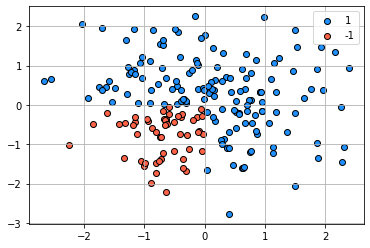

In [21]:
plt.scatter(X[y_true==1, 0], X[y_true==1, 1], color="dodgerblue", edgecolors='k', label="1")
plt.scatter(X[y_true==-1, 0], X[y_true==-1, 1], color="tomato", edgecolors='k', label="-1")
plt.grid()
plt.legend()
plt.show()

### División en Entrenamiento y Evaluación

Separemos la mitad para entrenamiento y la otra para evaluación.

In [22]:
train_size = 100
test_size = size - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_true[:train_size], y_true[train_size:]

elige la mitad para un lado y la mitad para el otro. mitad train mirad test (generalmente es mayor train)

In [23]:
X_train.shape, X_test.shape

((100, 2), (100, 2))

### Clasificación Lineal

Veamos qué tan mal anda un clasificador lineal sobre estos datos.

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train);

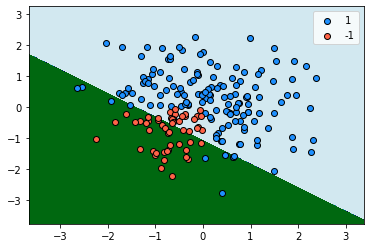

In [25]:
from utils import plot_decision_boundary

plot_decision_boundary(lambda x: model.predict(x), X, y_true)

Calculemos la calidad de la predicción en entrenamiento y evaluación:

In [26]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

calculo la prediccion tanto en entrenamiento como en evaluacion

In [27]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 0.91
Test accuracy: 0.78


### Nota al Margen: Induciendo Separabilidad Lineal

Muchas veces se pueden convertir datos no linealmente separables en datos separables (o casi) mediante la introducción de nuevos atributos que combinan los atributos existentes.
Un ejemplo de estos son los atributos polinomiales.

Aquí lo haremos con datos "OR", pero la diferencia es mucho más notable con datos de tipo "XOR".

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pre = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train2 = pre.fit_transform(X_train)

In [29]:
X_train.shape, X_train2.shape

((100, 2), (100, 3))

Grafiquemos:

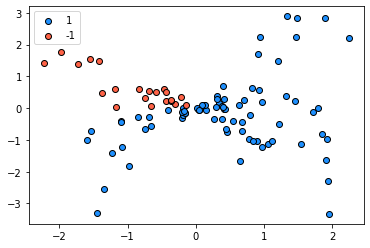

In [30]:
plt.scatter(X_train2[y_train==1, 1], X_train2[y_train==1, 2], color="dodgerblue", edgecolors='k', label="1")
plt.scatter(X_train2[y_train==-1, 1], X_train2[y_train==-1, 2], color="tomato", edgecolors='k', label="-1")
plt.legend()
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
    LogisticRegression()
)
model.fit(X_train, y_train);

In [32]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 0.97
Test accuracy: 0.86


### Entropía y Valores Reales

Calculemos la entropía inicial, y veamos cómo condicionar la entropía sobre variales reales (i.e. no categóricas)

In [34]:
y_train

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1])

In [63]:
probs(y_train) #distribucion probabilisticas entre las etiquetas

array([0.21, 0.79])

In [64]:
entropy(y_train) #no tengo maxima incertidumbre porque no es 0.5 y 0.5

0.7414827399312737

que atributo elijo entre x1 y x2 y que umbral alijo

Para hacer una división sobre una variable real usaremos un valor "threshold" (umbral):

In [37]:
def split(X, y, i, threshold):
    y1 = y[X[:, i] > threshold]
    y2 = y[X[:, i] <= threshold]
    return y1, y2 

toma dos parametros, el que voy a mirar

In [38]:
y1, y2 = split(X_train, y_train, 0, 0.00)

In [39]:
y1,y2

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1]),
 array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
         1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
         1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
        -1]))

In [40]:
entropy(y1), entropy(y2)

(-0.0, 0.9731560354421095)

In [41]:
cond_entropy(y1, y2)

0.506041138429897

In [42]:
information_gain(y1,y2)

0.23544160150137672

### Buscando la Mejor División

Ilustraremos un paso en la construcción del árbol de decisión.

Probemos muchos threshold para ambas variables y seleccionemos la mejor división.

En este caso buscaremos en una grilla uniforme de valores, pero existen técnicas mejores.

In [43]:
np.linspace(-2.5, 2.5, 11)

array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5])

In [44]:
best_ig = 0

for i in [0, 1]:
    for threshold in np.linspace(-2.5, 2.5, 11):
        y1, y2 = split(X_train, y_train, i, threshold)
        ig = information_gain(y1, y2)
        print(f'i={i}\tthreshold={threshold:+00.2f}\tig={ig:.2f}')

        if ig >= best_ig:
            best_ig = ig
            best_feature = i
            best_threshold = threshold

print('Mejor división:')
print(f'feature={best_feature}, threshold={best_threshold}, ig={best_ig:00.2f}')


i=0	threshold=-2.50	ig=0.00
i=0	threshold=-2.00	ig=0.00
i=0	threshold=-1.50	ig=0.00
i=0	threshold=-1.00	ig=0.00
i=0	threshold=-0.50	ig=0.12
i=0	threshold=+0.00	ig=0.24
i=0	threshold=+0.50	ig=0.13
i=0	threshold=+1.00	ig=0.06
i=0	threshold=+1.50	ig=0.03
i=0	threshold=+2.00	ig=0.01
i=0	threshold=+2.50	ig=0.00
i=1	threshold=-2.50	ig=0.00
i=1	threshold=-2.00	ig=0.02
i=1	threshold=-1.50	ig=0.05
i=1	threshold=-1.00	ig=0.06
i=1	threshold=-0.50	ig=0.12
i=1	threshold=+0.00	ig=0.32
i=1	threshold=+0.50	ig=0.15
i=1	threshold=+1.00	ig=0.07
i=1	threshold=+1.50	ig=0.04
i=1	threshold=+2.00	ig=0.00
i=1	threshold=+2.50	ig=0.00
Mejor división:
feature=1, threshold=0.0, ig=0.32


atributo cero con umbral cero tengo una ganancia de 0.24

Dividamos los datos de acuerdo a esta frontera:

In [45]:
best_feature, best_threshold

(1, 0.0)

In [46]:
y1, y2 = split(X_train, y_train, best_feature, best_threshold)

Con esta división, la entropía baja considerablemente:

In [47]:
entropy(y_train)

0.7414827399312737

In [48]:
cond_entropy(y1, y2)

0.42

## Árbol de Decisión con Scikit-learn

Aprendamos un árbol de decisión usando scikit-learn. Para ello usaremos la clase [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):


In [49]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

Ahora predecimos y evaluamos:

In [50]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 0.99
Test accuracy: 0.97


Dibujamos la frontera de decisión:

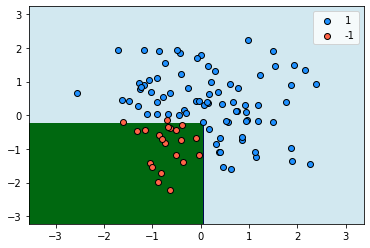

In [52]:
from utils import plot_decision_boundary

plot_decision_boundary(lambda x: clf.predict(x), X_train, y_train)

También podemos inspeccionar el árbol:

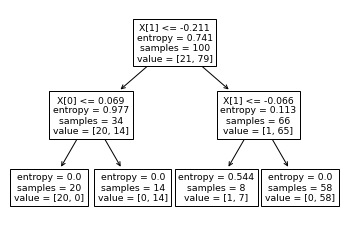

In [53]:
from sklearn.tree import plot_tree

plot_tree(clf);

In [54]:
entropy(y_train)

0.7414827399312737

## Ejercicios

1. Probar todos los experimentos con un dataset de tipo "XOR". ¿Qué sucede al decidir la división en el primer nivel del árbol?

## Referencias

Scikit-learn:

- [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [User Guide: Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
